In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(1)

Вариант 4
Входные сигналы:

$$x = sin(\frac{1}{2}t^2 - 5t), t \in [0, 2.2], h = 0.01$$
$$x = sin(-3t^2 + 5t + 10), t \in [0, 2.5], h = 0.01$$

$$ y = \frac{1}{3}sin(-3t^2 + 5t - 3)$$

In [29]:
def x1(t):
    return np.sin((t * t) / 2. - 5. * t)

def x2(t):
    return np.sin(-3. * t * t + 5 * t + 10)

def y(t):
    return np.sin(-3 * t * t + 5 * t - 3) / 3

h1 = 0.01
h2 = 0.01

t1 = (0, 2.2)
t2 = (0, 2.5)


Опишем класс сети

In [30]:
class ADALINE:
    def __init__(self, steps = 50, lr = 0.0001, stop_err=0.0):
        self.steps = steps
        self.w = None
        self.rate = lr
        self.stop_err = stop_err
    
    def fit(self, X, y):
        X_t = np.append(X, np.ones((X.shape[0], 1)), axis = 1)
        y_t = np.array(y)
        if self.w is None:
            self.w = np.random.random((X_t.shape[1], y_t.shape[1]))
        
        for _ in range(self.steps):
            for i in range(X_t.shape[0]):
                e = y_t[i] - X_t[i].dot(self.w)
                self.w += self.rate * X_t[i].reshape(X_t.shape[1], 1).dot(e.reshape(1, y_t.shape[1]))
            
            mse = ((y_t - X_t.dot(self.w))**2).mean()
            if mse < self.stop_err:
                break
                
        return self
    
    def set_steps(self, steps):
        self.steps = steps
        
    def set_learning_rate(self, rate):
        self.rate = rate
    

    def predict(self, X):
        X_t = np.append(X, np.ones((X.shape[0], 1)), axis = 1)
        return X_t.dot(self.w)
    
    def weights(self):
        return self.w[:-1]
    
    def bias(self):
        return self.w[-1]
        

    def score(self, X, y):
        X_t = np.append(X, np.ones((X.shape[0], 1)), axis = 1)
        y_t = np.array(y)
        return ((y_t - X_t.dot(self.w))**2).mean()**0.5
    

TDL

In [31]:
class TDL:
    def __init__(self, D = 1, pad_zeros=True):
        self.depth = D
        self.padding = pad_zeros
        self.queue = np.zeros(D)
        
    def fit(self, X, Y = None):
        if self.padding:
            in_arr = np.append(np.zeros(self.depth - 1), X)
            result = np.zeros((len(X) - 1, self.depth))
            if Y is None:
                Y = X[-len(X) + 1:]
            else:
                Y = Y[-len(X) + 1:]
        else:
            if len(X) < self.depth:
                return None
            in_arr = np.array(X)
            result = np.zeros((len(X) - self.depth, self.depth))
            if Y is None:
                Y = X[-len(X) + self.depth:]
            else:
                Y = Y[-len(X) + self.depth:]
        
        for i in range(in_arr.shape[0] - self.depth):
            result[i] = in_arr[i:i + self.depth]
            
        return result, Y
    
    def tdl_init(self, values):
        self.queue = np.append(np.zeros(1), np.array(values))
        
        
    def tdl_init_zeros(self):
        self.queue = np.zeros(self.depth)
        
    
    def predict(self, X):
        in_arr = np.append(self.queue[1:], X)
        result = np.zeros((len(X), self.depth))
        
        for i in range(in_arr.shape[0] - self.depth + 1):
            result[i] = in_arr[i:i + self.depth]
        self.queue = in_arr[-self.depth:]
        return result


In [32]:
class Filtrator:
    def __init__(self, D = 1, pad_zeros = False, steps = 50, l_r=0.001, stop=0.0):
        self.tdl = TDL(D, pad_zeros)
        self.linlr = ADALINE(steps, l_r, stop)
        self.tld_initialized = pad_zeros
        self.last_predict = None
        
    def fit(self, X, Y = None):
        X1, Y1 = self.tdl.fit(X, Y)
        Y1 = np.array(Y1).reshape(len(Y1), 1)
        self.linlr.fit(X1, Y1)
        return self
    
    def tdl_init(self, values):
        self.tdl.tdl_init(values)
        self.tld_initialized = True
        
    def tdl_init_zeros(self):
        self.tdl.tdl_init_zeros()
        self.tld_initialized = True
        
    def predict(self, x):
        ans = self.linlr.predict(self.tdl.predict(x)).ravel()
        self.last_predict = ans[-1]
        return ans
            
    def display(self):
        return self.tdl.display() + self.linlr.display()
    
    @staticmethod
    def score_value(Y_t, Y_p):
        return ((Y_t - Y_p)**2).mean()**0.5
        
    def gen_values(self, num, inpt = None):
        if inpt is not None:
            self.last_predict = inpt
        for i in range(num):
            yield self.predict(np.array([self.last_predict]))[0]

Задание №1

Построим обучающее множество. В качестве входного множества используем значения первого входного сигнала на заданном интервале

In [33]:
T = np.append(np.arange(*t1, h1), t1[1])
X = x1(T)

Создаем сеть. Скорость обучения 0.01, задержка 5. Число циклов в адаптации - 50.

In [34]:

D = 5
steps = 50
learn_rate = 0.01

model = Filtrator(D, False, steps, learn_rate).fit(X)

In [35]:

X_init = X[:D - 1]
X_test = X[D - 1:-1]

X_ans = X[D:]

In [36]:
model.tdl_init(X_init)

In [37]:
X_pred = model.predict(X_test)

Отобразим на графике эталонные значения и предсказанные сетью.

RMSE = 0.05405525237874221


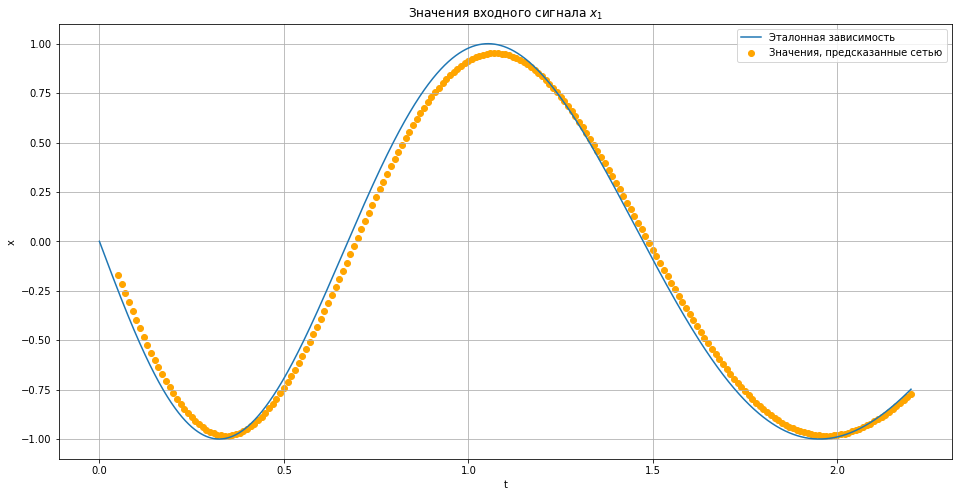

In [38]:

t = np.arange(*t1, 0.0001)
x = x1(t)
plt.figure(figsize=(16, 8))
plt.plot(t, x, label="Эталонная зависимость")
plt.scatter(T[D:], X_pred, color="orange", label="Значения, предсказанные сетью")
plt.title("Значения входного сигнала $x_1$")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.legend()

print("RMSE =", model.score_value(X_ans, X_pred))

Задание №2

Построить обучающее множество: в качестве входного множества использовать значения
первого входного сигнала на заданном интервале

In [39]:
T = np.append(np.arange(*t1, h1), t1[1])
X = x1(T)

Создаем сеть. Скорость обучения 0.001, задержка 3. Число эпох в обучении - 600.

In [40]:
D = 3
steps = 600
learn_rate = 0.001
stop_val = 10e-6

model = Filtrator(D, False, steps, learn_rate, stop_val).fit(X)


In [41]:

X_init = X[:D - 1]
X_test = X[D - 1:-1]

X_ans = X[D:]

In [42]:
model.tdl_init(X_init)

In [43]:

X_pred = model.predict(X_test)

Отобразим на графике эталонные значения и предсказанные сетью.

RMSE = 0.03982275893458956


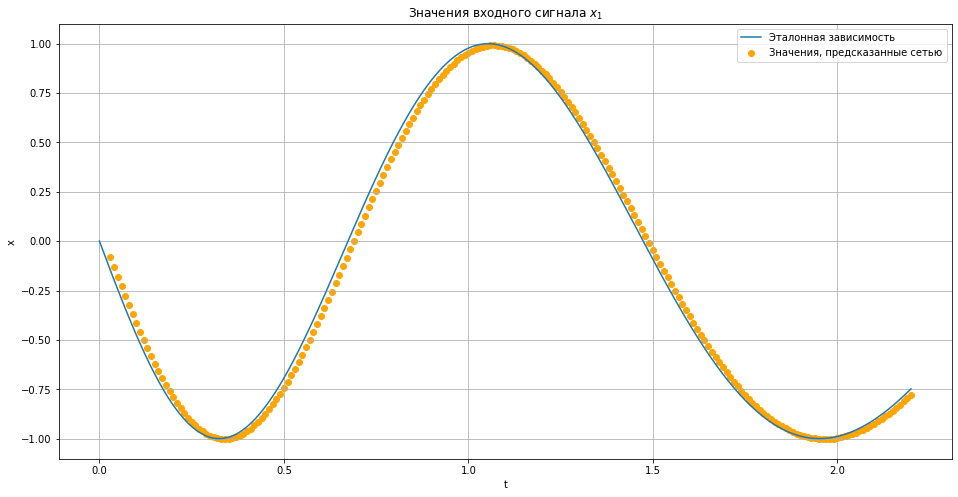

In [44]:
t = np.arange(*t1, 0.0001)
x = x1(t)
plt.figure(figsize=(16, 8))
plt.plot(t, x, label="Эталонная зависимость")
#plt.scatter(T, X, label="Входные значения")
plt.scatter(T[D:], X_pred, color="orange", label="Значения, предсказанные сетью")
plt.title("Значения входного сигнала $x_1$")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.legend()

print("RMSE =", model.score_value(X_ans, X_pred))

Сделаем предсказание за пределы обучающего множества на $K=10$ шагов вперед и посмотрим на результат.

In [45]:
K = 10

X_pred = np.array(list(model.gen_values(K)))

In [46]:

T_pred = []
for i in range(1, K + 1):
    T_pred.append(t1[1] + i*h1)
    
T_pred = np.array(T_pred)
X_ans = x1(T_pred)

RMSE = 0.16384976421466238


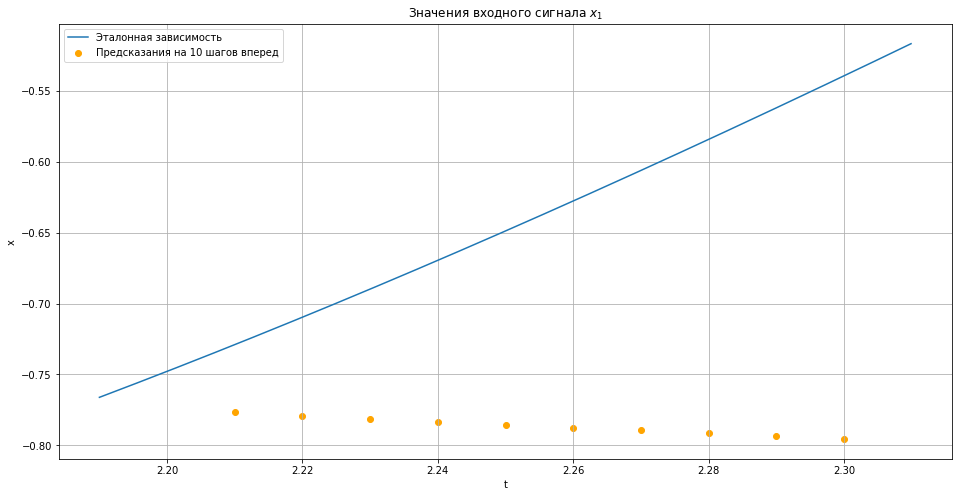

In [47]:
t = np.arange(t1[1] - h1, t1[1] + h1*11, 0.0001)
x = x1(t)
plt.figure(figsize=(16, 8))
plt.plot(t, x, label="Эталонная зависимость")
#plt.scatter(T, X, label="Входные значения")
plt.scatter(T_pred, X_pred, color="orange", label="Предсказания на 10 шагов вперед")
plt.title("Значения входного сигнала $x_1$")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.legend()

print("RMSE =", model.score_value(X_ans, X_pred))

Задание №3

In [48]:
T = np.append(np.arange(*t2, h2), t2[1])
X = x2(T)
Y = y(T)


In [49]:

D = 4
steps = 500
learn_rate = 0.0025
stop_val = 10e-6

model = Filtrator(D, True, steps, learn_rate, stop_val).fit(X, Y)

In [50]:
X_test = X[:-1]

X_ans = X[1:]
Y_ans = Y[1:]

In [51]:
model.tdl_init_zeros()

In [52]:

Y_pred = model.predict(X_test)

RMSE = 0.08583976009552448


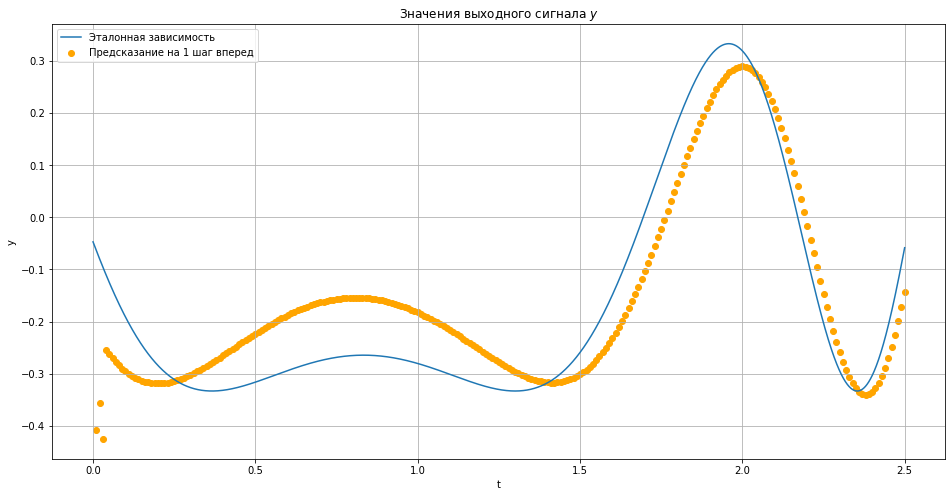

In [53]:

t = np.arange(*t2, 0.0001)
x = y(t)
plt.figure(figsize=(16, 8))
plt.plot(t, x, label="Эталонная зависимость")
plt.scatter(T[1:], Y_pred, color="orange", label="Предсказание на 1 шаг вперед")
plt.title("Значения выходного сигнала $y$")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.legend()

print("RMSE =", model.score_value(Y_ans, Y_pred))